<a href="https://colab.research.google.com/github/omarmoh26/BE-Alert/blob/main/Our_Dataset_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas_profiling as pp

# data = pd.read_csv('/content/gdrive/My Drive/adhamsleepy.csv')
# data1 = pd.read_csv('/content/gdrive/My Drive/anything.csv')
# data2 = pd.read_csv('/content/gdrive/My Drive/momsleepy.csv')
# data3 = pd.read_csv('/content/gdrive/My Drive/meawake.csv')
# data4 = pd.read_csv('/content/gdrive/My Drive/submission2.csv')
dataset=pd.read_csv('/content/gdrive/My Drive/acquiredDataset.csv')

<ipython-input-2-98ea1e1acbae>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
data.head()


,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [ ]:
dataset=pd.concat([data,data1,data2,data3,data4])
dataset.to_csv('/content/gdrive/My Drive/acquiredDataset.csv',index=False)

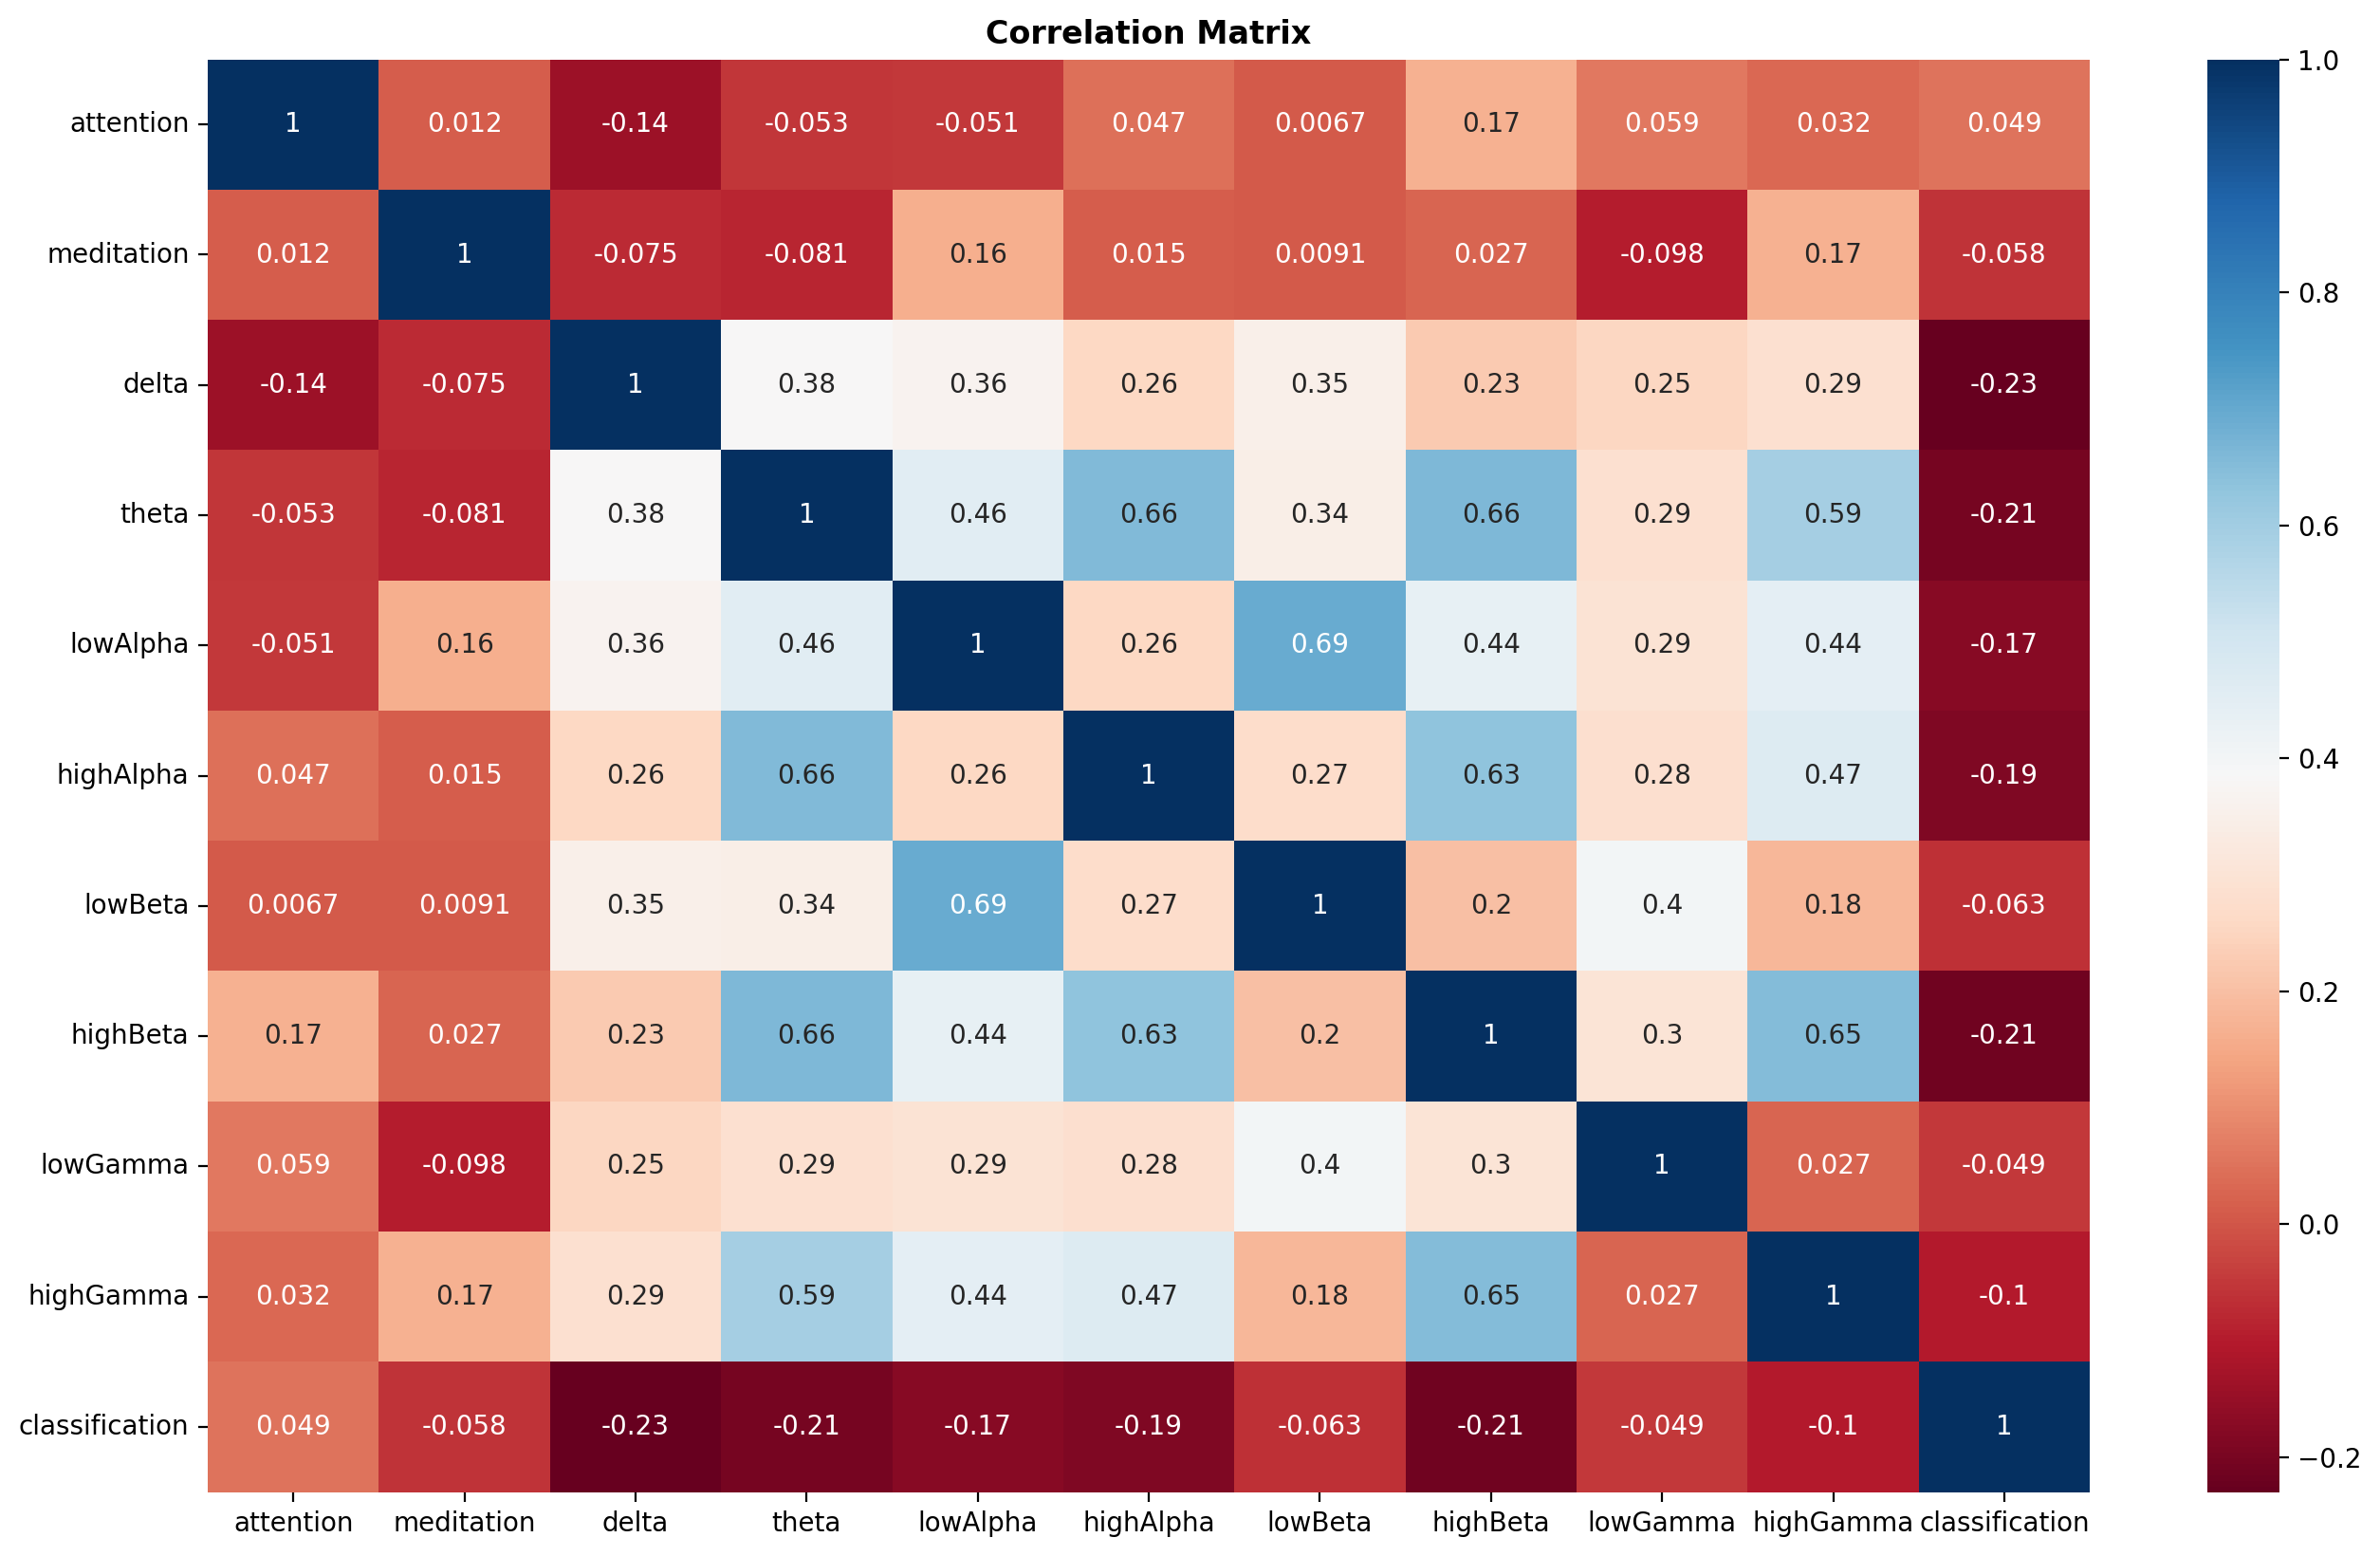

In [ ]:
%matplotlib inline
plt.figure(figsize = (16,10), dpi=200)
ax = plt.axes()
sns.heatmap(dataset.corr(), annot = True, cmap='RdBu', ax=ax)
ax.set_title('Correlation Matrix', weight='bold')
plt.show()

In [ ]:
dataset.head()
dataset[['attention','meditation','theta','highAlpha','lowAlpha']].describe()

,attention,meditation,theta,highAlpha,lowAlpha
count,3735.000000,3735.000000,3.735000e+03,3735.000000,3735.000000
mean,48.214726,56.577510,1.362420e+05,30580.759036,33413.343775
std,21.876949,19.066577,2.175501e+05,52681.858764,51970.930842
min,1.000000,1.000000,1.380000e+02,9.000000,32.000000
25%,35.000000,43.000000,2.347200e+04,6908.500000,7402.000000
50%,48.000000,56.000000,5.797200e+04,14928.000000,16481.000000
75%,63.000000,69.000000,1.514855e+05,33147.500000,37721.500000
max,100.000000,100.000000,3.194358e+06,785947.000000,699008.000000


In [ ]:
data1=dataset[['attention','classification','theta','highAlpha','lowAlpha']]

In [ ]:
data1.head()

,attention,classification,theta,highAlpha,lowAlpha
0,26,0,277180,27356,26575
1,29,0,28225,39551,20172
2,40,0,43144,13564,8601
3,66,0,41211,34254,2534
4,81,0,47239,47349,33158


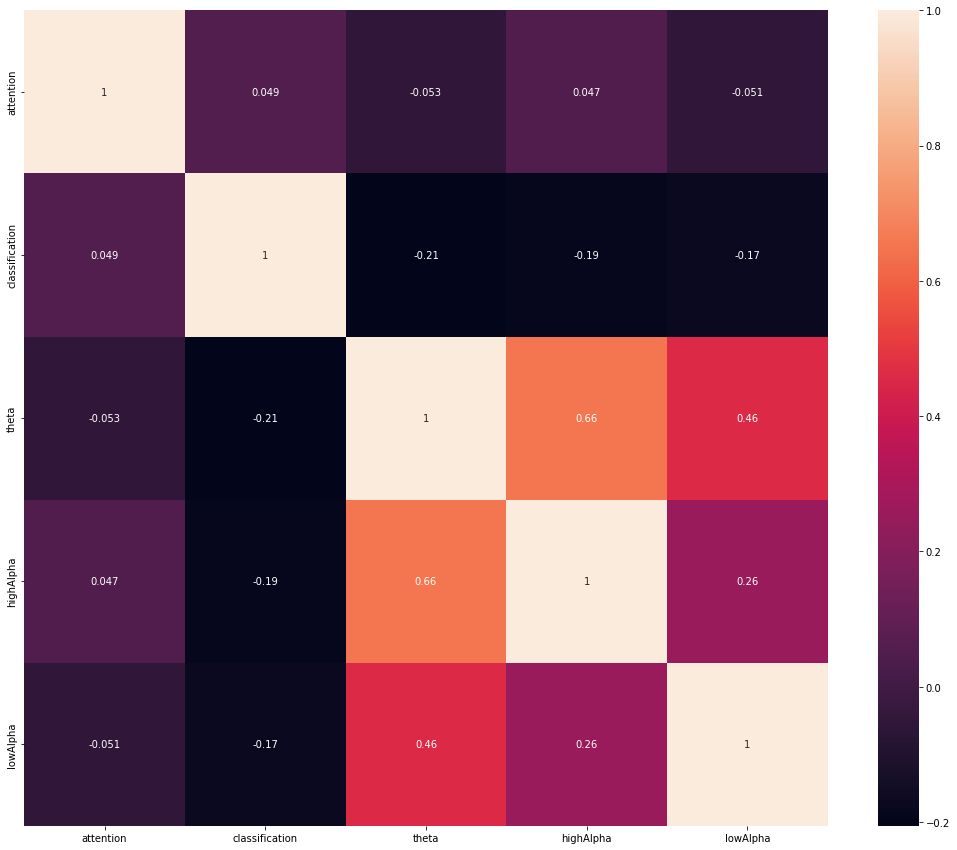

In [ ]:
corr = data1.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.1 MB 23.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 35.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=344582 sha256=1d0c8a041658a552ec96c68318e9db579d17bcaf4b890592cb03da7179e67747
  Stored in directory: /tmp/pip-ephem-wheel-cache-xdknalb9/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sh

In [ ]:
# One-hot encoding Ethnicity and Gender
# df = pd.get_dummies(data1)

pp.ProfileReport(data1)

TypeError: ignored

In [ ]:
result = []
for value in data1['Attention']:
    if value >= 50:
        result.append('1')
    else:
        result.append('0')

data1["Result"] = result  
print(data1)

       Attention      Theta    Alpha1    Alpha2 Result
0           56.0    90612.0   33735.0   23991.0      1
1           40.0    28083.0    1439.0    2240.0      0
2           47.0   383745.0  201999.0   62107.0      0
3           47.0   129350.0   61236.0   17084.0      0
4           44.0   354328.0   37102.0   88881.0      0
...          ...        ...       ...       ...    ...
12806       64.0     9951.0     709.0   21732.0      1
12807       61.0   797464.0  153171.0  145805.0      1
12808       60.0   154296.0   40068.0   39122.0      1
12809       60.0    27346.0   11444.0    9932.0      1
12810       64.0  1184366.0   50014.0  124208.0      1

[12811 rows x 5 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data1['classification'].value_counts()

0    2135
1    1600
Name: classification, dtype: int64

In [ ]:
y=data1.pop('classification')
data1=data1.drop(columns=['attention'])
data1.head()

,theta,highAlpha,lowAlpha
0,277180,27356,26575
1,28225,39551,20172
2,43144,13564,8601
3,41211,34254,2534
4,47239,47349,33158


In [ ]:
scaler = StandardScaler()
X=scaler.fit_transform(data1)
print(X)

[[ 0.64792838 -0.06122014 -0.13159779]
 [-0.49658206  0.17029471 -0.25481777]
 [-0.42799556 -0.32305309 -0.47749128]
 ...
 [-0.26419065 -0.28960257  0.66789843]
 [ 0.57919477  0.35738605  0.55639811]
 [-0.60671397 -0.55173927 -0.56535985]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

# from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy) )

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
Accuracy for our training dataset with tuning is : 61.09%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [ ]:
knn = KNeighborsClassifier()
# from sklearn.model_selection import GridSearchCV
k_range = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 15}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 63.04%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
print(CV_rfc.best_params_)
accuracy = CV_rfc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
Accuracy for our training dataset with tuning is : 64.12%


In [ ]:
from sklearn.svm import SVC


In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','polynomial']} 
              # ,'linear','sigmoid'
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.598 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.671 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.584 total time=   0.2s
[CV 1/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.577 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linea

KeyboardInterrupt: ignored

In [ ]:
print(grid.best_params_)

In [ ]:
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

In [ ]:
param_grid_full = [
  {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
  {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
 ]

grid_full = GridSearchCV(SVC(), param_grid_full, cv = 10, scoring='accuracy') 
grid_full.fit(x_train, y_train) 

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['sigmoid']}],
             scoring='accuracy')

In [ ]:
print(grid_full.best_params_)


{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}


In [ ]:
grid_predictions = grid_full.predict(x_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.60
